In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch.yml")

#Sector 20 Configurator GUI TCAV optics values, as of 2024-08-16
# Q5FFkG : -192.1
# Q4FFkG : -162.2
# Q3FFkG : 105.6
# Q2FFkG : 120.5
# Q1FFkG : -209.4
# Q0FFkG : 120.5
# Q0DkG  : -139.3
# Q1DkG  : 225.4
# Q2DkG  : -139.3
# importedDefaultSettings = importedDefaultSettings | {
#     "Q5FFkG" : -192.1,
#     "Q4FFkG" : -162.2,
#     "Q3FFkG" : 105.6,
#     "Q2FFkG" : 120.5,
#     "Q1FFkG" : -209.4,
#     "Q0FFkG" : 120.5,
#     "Q0DkG"  : -139.3,
#     "Q1DkG"  : 225.4,
#     "Q2DkG"  : -139.3,
# }

In [3]:
csrTF = True

inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
)

setLattice(tao, **importedDefaultSettings)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0


In [4]:
trackBeam(tao, centerBC14 = True, centerBC20 = True, centerMFFF = True)

In [5]:
allBeams = { key : getBeamAtElement(tao, key) for key in ["BEGBC20", "MFFF", "PENT", "DTOTR"] } 

PENT


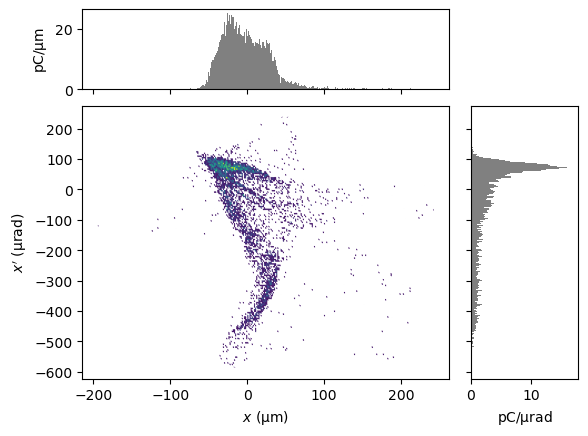

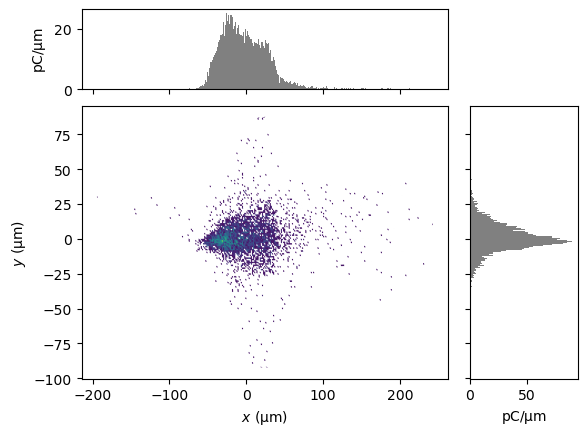

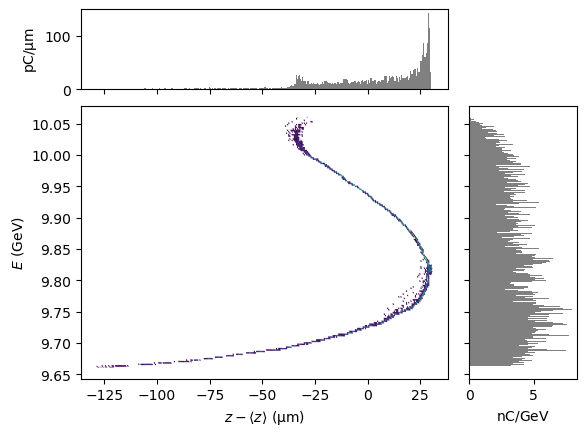

DTOTR


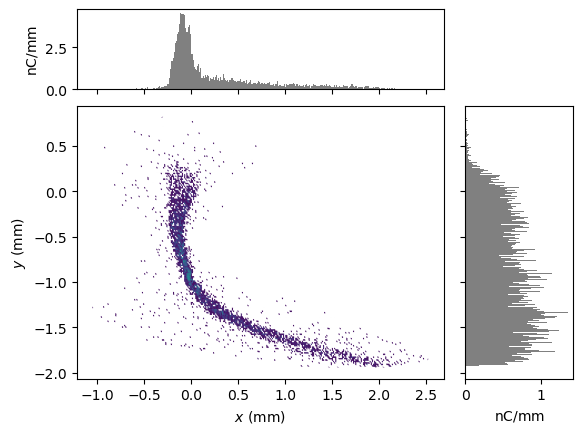

<Figure size 640x480 with 0 Axes>

In [6]:
print("PENT")
display(plotMod(allBeams["PENT"], 'x', 'xp',  bins=300));
display(plotMod(allBeams["PENT"], 'x', 'y',  bins=300));
display(plotMod(allBeams["PENT"], 'delta_z', 'energy',  bins=300));

print("DTOTR")
display(plotMod(allBeams["DTOTR"], 'x', 'y',  bins=300));


plt.clf()

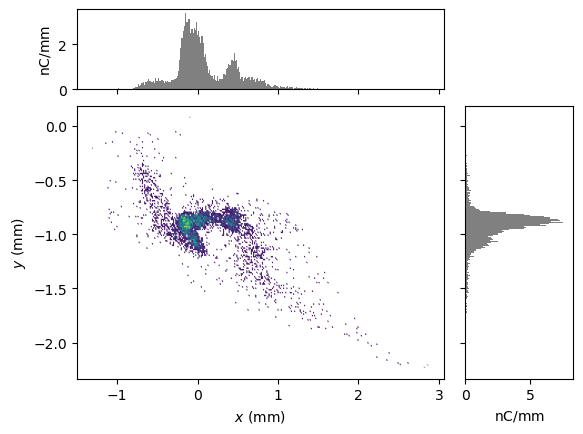

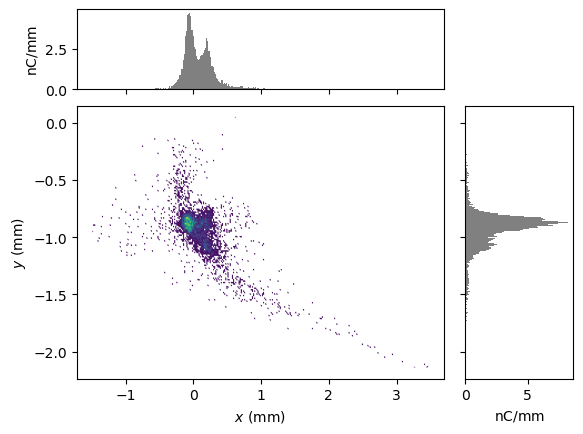

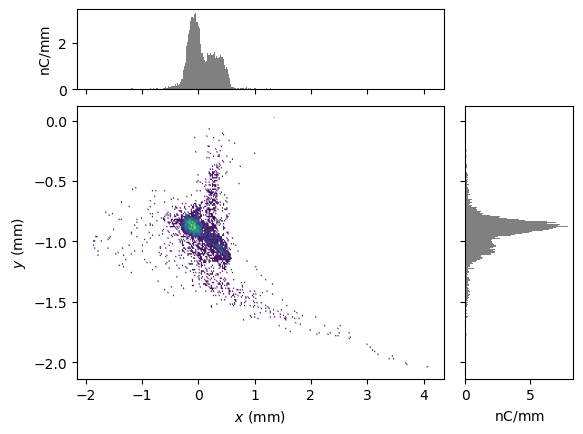

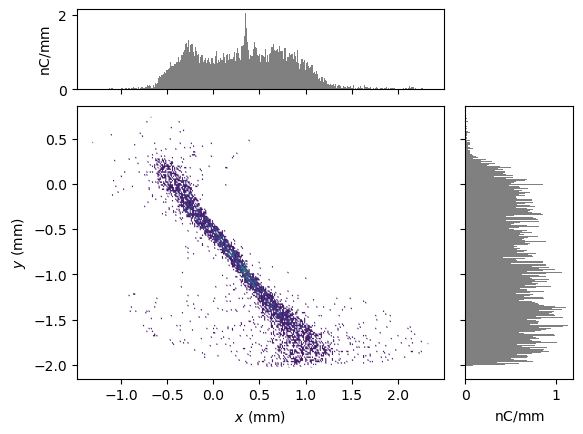

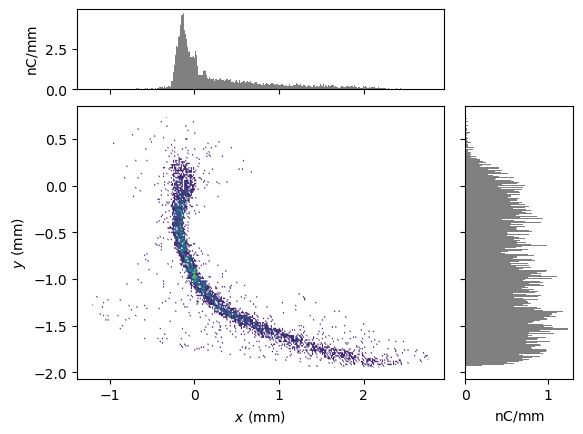

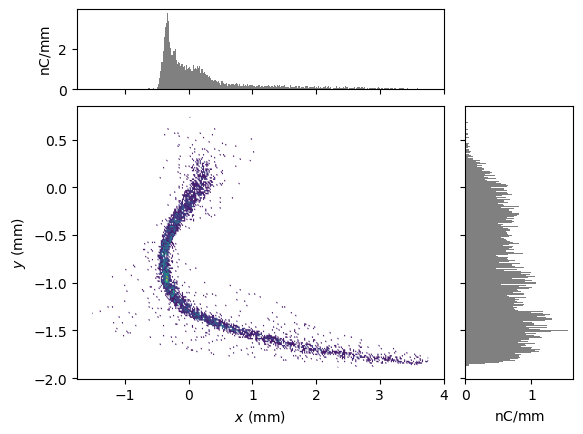

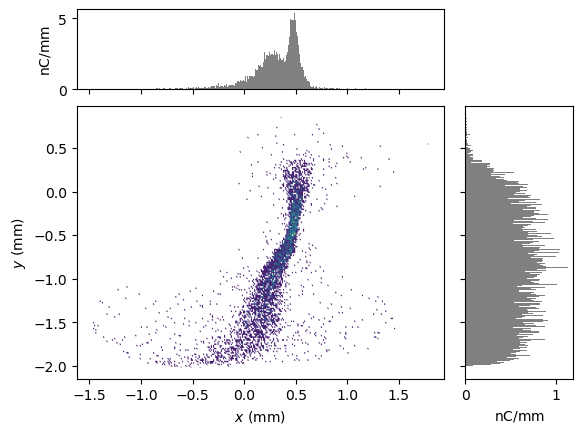

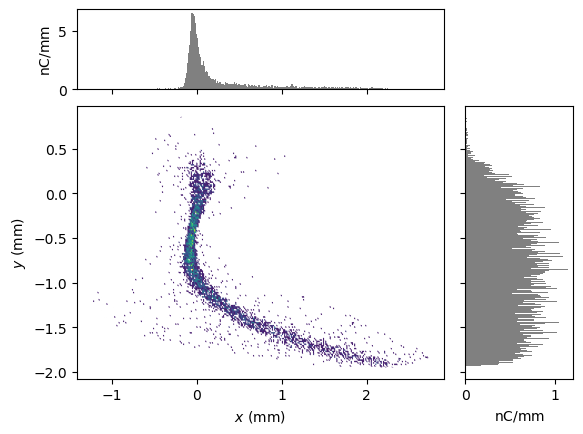

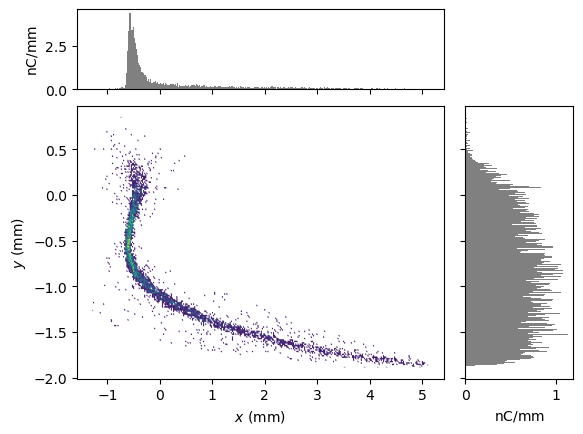

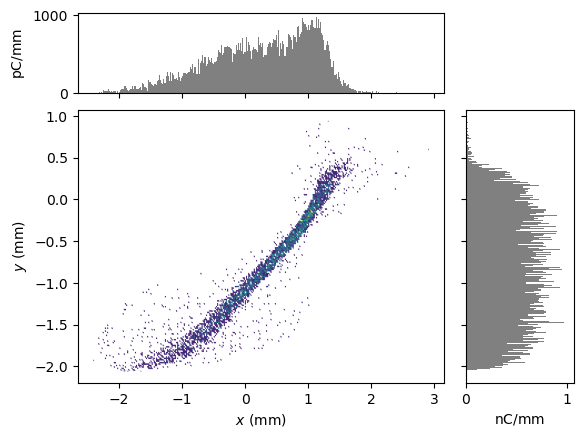

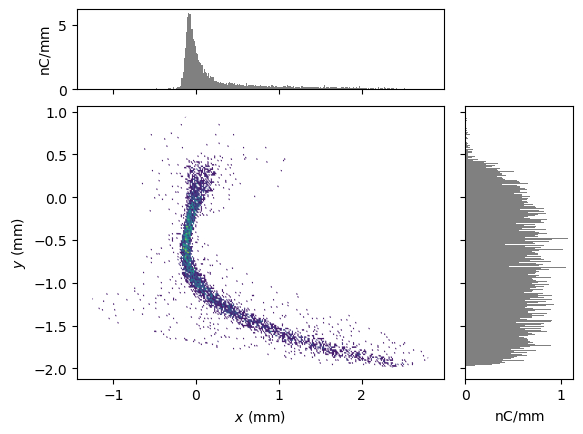

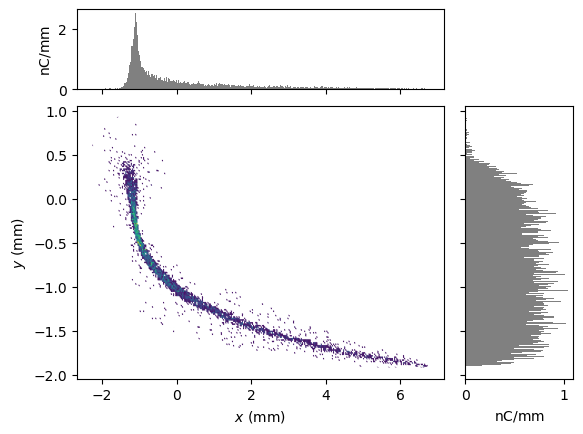

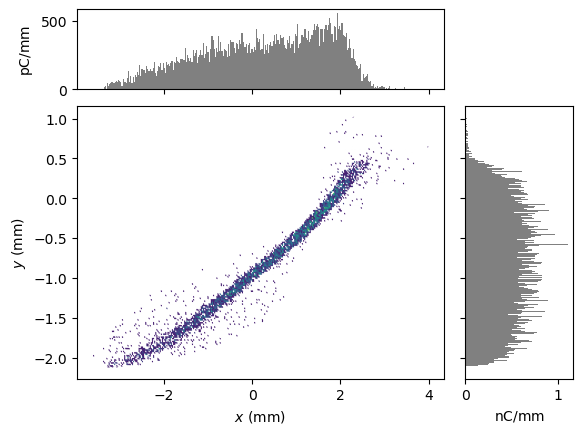

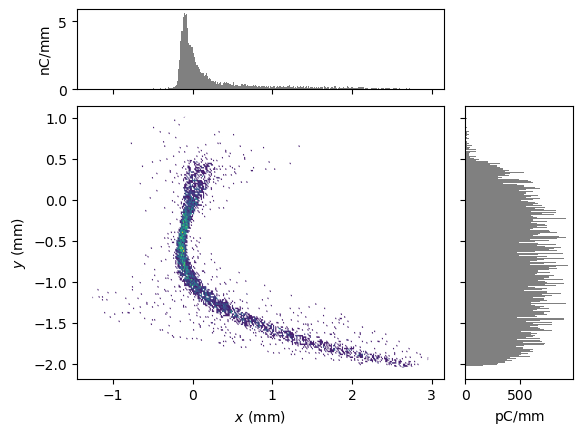

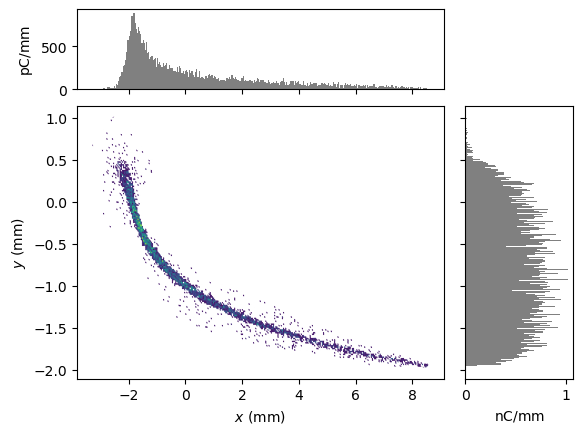

In [7]:
tcavCases = {
    "+90" : -20e6,
    "off" : 0, 
    "-90" : 20e6
}

for L2Phase in [-31.2, -33.2, -35.2, -37.2, -39.2]: #[-31.2, -33.2, -35.2, -37.2]
    for tcavKey in tcavCases:
        setLattice(tao, **(importedDefaultSettings | {"XTCAVvoltage":  tcavCases[tcavKey], "XTCAVphase" : 0, "L2PhaseSet" : L2Phase }))
        trackBeam(tao, centerBC14 = True, centerBC20 = True, centerMFFF = True)
        
        allBeams = { key : getBeamAtElement(tao, key) for key in ["BEGBC20", "MFFF", "PENT", "DTOTR"] } 
        
        display(plotMod(allBeams["DTOTR"], 'x', 'y',  bins=300));
        
        (allBeams["DTOTR"]).write(f"beams/{tcavKey}_{L2Phase}_DTOTR.h5")
        
        plt.clf()